In [1]:
#Loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from datetime import datetime
from statistics import mean 

In [2]:
#Loading ewquired datasets
df_data = pd.read_csv('QVI_dataQuantium.csv')
df_data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [3]:
#Setting up the style to be used for plotting
style.use('seaborn-muted')

The client has selected store numbers 77, 86 and 88 as trial stores and want
control stores to be established stores that are operational for the entire
observation period.
We would want to match trial stores to control stores that are similar to the trial
store prior to the trial period of Feb 2019 in terms of :
- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer


In [4]:
month_id = [] 

for index,row in df_data.iterrows():
    datetimeobject = datetime.strptime(row['DATE'],'%Y-%m-%d')
    month_id.append(datetimeobject.strftime('%Y%m'))

    
df_data['YEARMONTH'] = month_id


In [5]:
df_data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,201812
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,201810
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,201810
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,201810


In [6]:
grouped_data = df_data.groupby(['STORE_NBR','YEARMONTH']) 

In [7]:
#Total sales for every store for each month

total_meta_data = grouped_data.agg({'TOT_SALES': 'sum'})

In [8]:
#Total cutomers for every store for each month

total_customers = grouped_data['LYLTY_CARD_NBR'].nunique()

In [9]:
#Trnsaction per customer

transaction_per_customer = total_meta_data['TOT_SALES']/total_customers

In [10]:
#Number of chips(product quantity) per customer

prod_quantity = grouped_data.agg({'PROD_QTY': 'sum'})
chip_per_customer = prod_quantity['PROD_QTY']/total_customers

In [11]:
#Average price per unit

average_chip_price = total_meta_data['TOT_SALES']/prod_quantity['PROD_QTY']

In [12]:
#Adding columns and creating a full meta data dataframe for grouped data

total_meta_data['TOTAL_CUSTOMERS'] = total_customers
total_meta_data['TRASACTION_PER_CUSTOMER'] = transaction_per_customer
total_meta_data['CHIPS_PER_CUSTOMER'] = chip_per_customer
total_meta_data['AVERAGE_PRICE_PER_UNIT'] = average_chip_price
total_meta_data

TOT_SALES  TOTAL_CUSTOMERS  TRASACTION_PER_CUSTOMER  \
STORE_NBR YEARMONTH                                                        
1         201807         206.9               49                 4.222449   
          201808         176.1               42                 4.192857   
          201809         278.8               59                 4.725424   
          201810         188.1               44                 4.275000   
          201811         192.6               46                 4.186957   
...                        ...              ...                      ...   
272       201902         395.5               45                 8.788889   
          201903         442.3               50                 8.846000   
          201904         445.1               54                 8.242593   
          201905         314.6               34                 9.252941   
          201906         312.1               34                 9.179412   

                     CHIPS_PER_CUSTOMER  AVERAGE_PRICE_PER_UNIT  
STORE_NBR YEARMONTH                                              
1         201807               1.265306                3.337097  
          201808               1.285714                3.261111  
          201809               1.271186                3.717333  
          201810               1.318182                3.243103  
          201811               1.239130                3.378947  
...                                 ...                     ...  
272       201902               2.022222                4.346154  
          201903               2.020000                4.379208  
          201904               1.944444                4.239048  
          201905               2.088235                4.430986  
          201906               2.058824                4.458571  

[3169 rows x 5 columns]

In [13]:
#Groupby store number
grouped_store = pd.DataFrame(df_data.groupby('STORE_NBR'))

In [14]:
#Selecting stores with data of 12 months but not less

preTrialMeasure = df_data.reset_index().groupby('STORE_NBR')['YEARMONTH'].nunique() == 12

In [15]:
#Creating dataframe of selected stores

df_pretrial_full_12 = total_meta_data.loc[[1]]
false_index = []

for i in range(2,273):
    if(preTrialMeasure[i] == True):
        df_temp = total_meta_data.loc[[i]]
        df_pretrial_full_12 = df_pretrial_full_12.append(df_temp)
        
    else:
        false_index.append(i)

In [16]:
#Creating dataframe from the stores having data of less than 12 months

df_pretrial_less_12 = total_meta_data.loc[[false_index[0]]]

for i in range(2,len(false_index)):
    df_temp = total_meta_data.loc[[false_index[i]]]
    df_pretrial_less_12 = df_pretrial_less_12.append(df_temp)

In [17]:
df_pretrial_less_12.reset_index(inplace=True)
df_pretrial_full_12.reset_index(inplace=True)

Now we need to work out a way of ranking how similar each potential control store
is to the trial store. We can calculate how correlated the performance of each
store is to the trial store.

Let's write a function for this so that we don't have to calculate this for each
trial store and control store pair.


In [18]:
#Correlation will tell us about how much one trial stores are correalted with each of the control stores.
'''
function to calculate correlation for a measure, looping
through each control store.

inputTable(DataFrame) : A metric table with potential comparison stores
metricCol(str) : The store metric used to calculate correlation on
storeComparison : the store number of the trial store.
'''
#The client has selected store numbers 77, 86 and 88 as trial stores and want
#control stores to be established stores that are operational for the entire observation period.

def calculateCorrelation(inputTable, metricCol, storeComparison):
    #Collecting store numbers of all the control stores.
    control_store_numbers = list(df_data['STORE_NBR'].unique())
    
    #Removing trial store numbers from control store numbers.
    control_store_numbers.remove(77)
    control_store_numbers.remove(86)
    control_store_numbers.remove(88)
    
    #Dataframe to return
    calCorrTable = pd.DataFrame(columns=['YEARMONTH','TRIAL_STORE','CONTROL_STORE','CORR_SCORE'])
    
    #Selecting the row of trial store with all the columns
    trial_store_rows = inputTable[inputTable['STORE_NBR'] == storeComparison][metricCol].reset_index()
    
    #Looping through all control stores
    for store in control_store_numbers:
        #Creating a dummy dataframe to append later
        dummy_df = pd.DataFrame(columns=['YEARMONTH','TRIAL_STORE','CONTROL_STORE','CORR_SCORE'])
        #Selecting the row of control store with all the columns
        control_store_rows = inputTable[inputTable['STORE_NBR'] == store][metricCol].reset_index()
        
        #Performing correaltion between 2 rows
        dummy_df['CORR_SCORE'] = trial_store_rows.corrwith(control_store_rows,axis=1)
        dummy_df['CONTROL_STORE'] = store
        dummy_df['TRIAL_STORE'] = storeComparison
        dummy_df['YEARMONTH'] = list(inputTable[inputTable['STORE_NBR'] == storeComparison]['YEARMONTH'])
        
        #Appending the results to final table for each control store.
        calCorrTable = calCorrTable.append(dummy_df)
    return calCorrTable

    

    

In [19]:
answer_df = calculateCorrelation(df_pretrial_full_12,['TOT_SALES','TOTAL_CUSTOMERS','TRASACTION_PER_CUSTOMER','CHIPS_PER_CUSTOMER','AVERAGE_PRICE_PER_UNIT'],77)

Apart from correlation, we can also calculate a standardised metric based on the
absolute difference between the trial store's performance and each control store's
performance.


In [20]:
# Function to calculate a standardised magnitude distance for a measure
'''
function to calculate correlation for a measure, looping
through each control store.

inputTable(DataFrame) : A metric table with potential comparison stores
metricCol(str) : The store metric used to calculate correlation on
storeComparison : the store number of the trial store.
'''
def calculateMagnitudeDistance(inputTable, metricCol, storeComparison):
    #Collecting store numbers of all the control stores.
    control_store_numbers = list(df_data['STORE_NBR'].unique())
    
    #Removing trial store numbers from control store numbers.
    control_store_numbers.remove(77)
    control_store_numbers.remove(86)
    control_store_numbers.remove(88)
   
    #Selecting the row of trial store with all the columns
    trial_store_rows = inputTable[inputTable['STORE_NBR'] == storeComparison][metricCol].reset_index()
    
    #Initialising a dataframe
    #distance = pd.DataFrame(columns=['TOT_SALES','TOTAL_CUSTOMERS','TRASACTION_PER_CUSTOMER','CHIPS_PER_CUSTOMER','AVERAGE_PRICE_PER_UNIT','YEARMONTH','TRIAL_STORE','CONTROL_STORE'])
    distance = pd.DataFrame()
    for store in control_store_numbers:
        control_store_rows = inputTable[inputTable['STORE_NBR'] == store][metricCol].reset_index()
        dummy_df = abs(trial_store_rows-control_store_rows)
        dummy_df['TRIAL_STORE'] = storeComparison
        dummy_df['CONTROL_STORE'] = store
        dummy_df['YEARMONTH'] = list(inputTable[inputTable['STORE_NBR'] == storeComparison]['YEARMONTH'])
        distance = distance.append(dummy_df)
        
    for column in metricCol:
            distance[column] = 1 - ((distance[column]-distance[column].min())/(distance[column].max()-distance[column].min()))
    
    magnitude = []
    for index,row in distance.iterrows():
        mean_list = []
        for col in metricCol:
            mean_list.append(row[col])
            
        magnitude.append(mean(mean_list))
        
    distance['MAGNITUDE'] = magnitude
        
    return distance
            
        
    

In [21]:
answer_df = calculateMagnitudeDistance(df_pretrial_full_12,['TOT_SALES','TOTAL_CUSTOMERS','TRASACTION_PER_CUSTOMER','CHIPS_PER_CUSTOMER','AVERAGE_PRICE_PER_UNIT'],77)


In [22]:
answer_df[answer_df['CONTROL_STORE'] == 272] 

,index,TOT_SALES,TOTAL_CUSTOMERS,TRASACTION_PER_CUSTOMER,CHIPS_PER_CUSTOMER,AVERAGE_PRICE_PER_UNIT,TRIAL_STORE,CONTROL_STORE,YEARMONTH,MAGNITUDE
0,2244.0,0.902104,0.971154,0.481223,0.730637,0.528305,77,272,201807,0.722685
1,2244.0,0.915715,0.971154,0.508075,0.756069,0.502899,77,272,201808,0.730782
2,2244.0,0.942900,0.903846,0.326115,0.623142,0.428011,77,272,201809,0.644803
3,2244.0,0.837607,0.932692,0.310005,0.423471,0.778175,77,272,201810,0.656390
4,2244.0,0.905983,1.000000,0.482946,0.667019,0.647109,77,272,201811,0.740611
5,2244.0,0.901889,0.990385,0.549411,0.775831,0.560442,77,272,201812,0.755592
6,2244.0,0.842994,0.894231,0.456523,0.843127,0.328315,77,272,201901,0.673038
7,2244.0,0.884723,1.000000,0.422310,0.742125,0.376854,77,272,201902,0.685203
8,2244.0,0.882353,1.000000,0.469438,0.740608,0.476755,77,272,201903,0.713831
9,2244.0,0.869568,0.932692,0.573170,0.805545,0.541730,77,272,201904,0.744541


Now let's use the functions to find the control stores! We'll select control stores
based on how similar monthly total sales in dollar amounts and monthly number of
customers are to the trial stores. So we will need to use our functions to get four
scores, two for each of total sales and total customers.

We'll need to combine the all the scores calculated using our function to create a
composite score to rank on. 

In [23]:
#For Total Sales

trial_stores = [77,86,88]

correlation_table = pd.DataFrame()
magnitude_table = pd.DataFrame() 

for trial_store in trial_stores:
    correlation_table = correlation_table.append(calculateCorrelation(df_pretrial_full_12,['TOT_SALES'], trial_store))
    magnitude_table = magnitude_table.append(calculateMagnitudeDistance(df_pretrial_full_12,['TOT_SALES'], trial_store))
    

answer_df_total_sales = pd.merge(correlation_table,magnitude_table,how='inner',on=['CONTROL_STORE','TRIAL_STORE','YEARMONTH'])


In [24]:
corr_weight = 0.5
mag_weight = 0.5

answer_df_ts = answer_df_total_sales.groupby(["TRIAL_STORE", "CONTROL_STORE"]).mean().reset_index()
answer_df_ts['CONTROL_SCORE'] = (corr_weight*answer_df_ts['CORR_SCORE'])+(mag_weight*answer_df_ts['MAGNITUDE'])

highest_ts = pd.DataFrame()
for trial_store in trial_stores:
    temp_df_ts = answer_df_ts[answer_df_ts['TRIAL_STORE'] == trial_store][['TRIAL_STORE','CONTROL_STORE','CORR_SCORE','MAGNITUDE','CONTROL_SCORE']]
    highest_ts = highest_ts.append(temp_df_ts.sort_values('CONTROL_SCORE',ascending=False).head())

highest_ts

,TRIAL_STORE,CONTROL_STORE,CORR_SCORE,MAGNITUDE,CONTROL_SCORE
45,77,46,1.000000,0.979689,0.989844
210,77,214,1.000000,0.976550,0.988275
172,77,176,1.000000,0.975658,0.987829
184,77,188,1.000000,0.975329,0.987664
229,77,233,1.000000,0.975227,0.987613
420,86,155,0.833333,0.956987,0.895160
494,86,229,0.833333,0.951598,0.892466
374,86,109,0.833333,0.951034,0.892183
362,86,97,0.833333,0.937158,0.885246
492,86,227,0.833333,0.936647,0.884990


In [25]:
#For Total Customers

trial_stores = [77,86,88]

correlation_table = pd.DataFrame()
magnitude_table = pd.DataFrame() 

for trial_store in trial_stores:
    correlation_table = correlation_table.append(calculateCorrelation(df_pretrial_full_12,['TOTAL_CUSTOMERS'], trial_store))
    magnitude_table = magnitude_table.append(calculateMagnitudeDistance(df_pretrial_full_12,['TOTAL_CUSTOMERS'], trial_store))
    

answer_df_total_customers = pd.merge(correlation_table,magnitude_table,how='inner',on=['CONTROL_STORE','TRIAL_STORE','YEARMONTH'])


In [26]:
corr_weight = 0.5
mag_weight = 0.5

answer_df_tc = answer_df_total_customers.groupby(["TRIAL_STORE", "CONTROL_STORE"]).mean().reset_index()
answer_df_tc['CONTROL_SCORE'] = (corr_weight*answer_df_tc['CORR_SCORE'])+(mag_weight*answer_df_tc['MAGNITUDE'])

highest_tc = pd.DataFrame()

for trial_store in [77,86,88]:
    temp_df_tc = answer_df_tc[answer_df_tc['TRIAL_STORE'] == trial_store][['TRIAL_STORE','CONTROL_STORE','CORR_SCORE','MAGNITUDE','CONTROL_SCORE']]
    highest_tc = highest_tc.append(temp_df_tc.sort_values('CONTROL_SCORE',ascending=False).head())
    
highest_tc

,TRIAL_STORE,CONTROL_STORE,CORR_SCORE,MAGNITUDE,CONTROL_SCORE
229,77,233,1.0,0.972756,0.986378
40,77,41,1.0,0.970353,0.985176
16,77,17,1.0,0.963141,0.981571
63,77,64,1.0,0.959135,0.979567
111,77,115,1.0,0.955929,0.977965
420,86,155,1.0,0.960177,0.980088
494,86,229,1.0,0.959440,0.979720
325,86,57,1.0,0.953540,0.976770
490,86,225,1.0,0.952802,0.976401
443,86,178,1.0,0.950590,0.975295


In [27]:
highest_common = highest_ts.merge(highest_tc,how='inner',on=['CONTROL_STORE'])
highest_common['AVERAGE_CONTROL_SCORE'] = (highest_common['CONTROL_SCORE_x']+highest_common['CONTROL_SCORE_y'])/2
highest_common

,TRIAL_STORE_x,CONTROL_STORE,CORR_SCORE_x,MAGNITUDE_x,CONTROL_SCORE_x,TRIAL_STORE_y,CORR_SCORE_y,MAGNITUDE_y,CONTROL_SCORE_y,AVERAGE_CONTROL_SCORE
0,77,233,1.000000,0.975227,0.987613,77,1.0,0.972756,0.986378,0.986996
1,86,155,0.833333,0.956987,0.895160,86,1.0,0.960177,0.980088,0.937624
2,86,229,0.833333,0.951598,0.892466,86,1.0,0.959440,0.979720,0.936093
3,88,40,1.000000,0.935675,0.967837,88,1.0,0.931818,0.965909,0.966873


In [28]:
highest_score_for_86 = highest_common[highest_common['TRIAL_STORE_x'] == 86]['AVERAGE_CONTROL_SCORE'].max()
highest_common[highest_common['AVERAGE_CONTROL_SCORE'] == highest_score_for_86]['CONTROL_STORE']

1    155
Name: CONTROL_STORE, dtype: int64

OBSERVATIONS


Top 3 control stores based upon TOTAL SALES


Trial store 77 : 46,214,176


Trial store 86 : 155,229,109


Trial store 88 : 40,26,58




Top 3 control stores based upon TOTAL CUSTOMERS


Trial store 77 : 233,41,17


Trial store 86 : 155,229,57


Trial store 88 : 237,40,201




Top control stores based upon TOTAL CUSTOMERS and TOTAL SALES


Trial store 77 : 233


Trial store 86 : 155


Trial store 88 : 40


Hence we can say that trial store 77 has most similarity with control store 233, trial store 86 has the most similarity with control store 155 and the trial store 88 has he most similarity with control store 40.



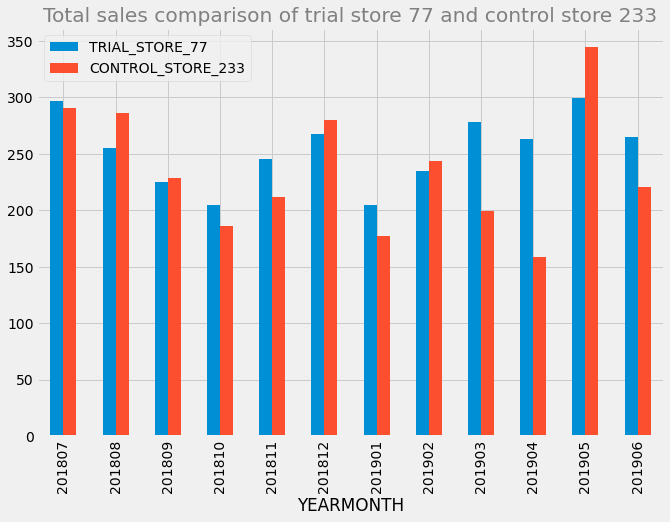

In [29]:
style.use('fivethirtyeight')
total_sales_233 = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR']==233]['TOT_SALES']
total_sales_77 = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR']==77]['TOT_SALES']
yearmonth = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR']==77]['YEARMONTH']

df_plot_sales_77_233 = pd.DataFrame({'YEARMONTH':yearmonth,'TRIAL_STORE_77':total_sales_77})
df_plot_sales_77_233['CONTROL_STORE_233'] = list(total_sales_233)

df_plot_sales_77_233.plot(x='YEARMONTH', y=['TRIAL_STORE_77','CONTROL_STORE_233'], kind="bar",figsize=(10,7))
plt.title('Total sales comparison of trial store 77 and control store 233',color='grey');

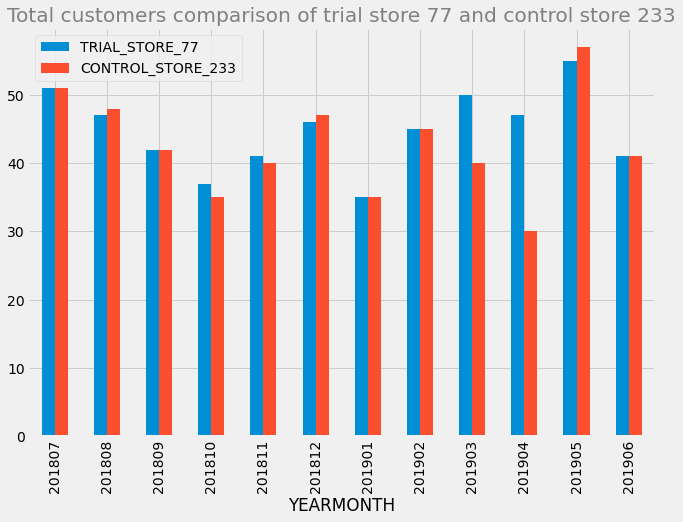

In [30]:
style.use('fivethirtyeight')
total_customers_233 = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR']==233]['TOTAL_CUSTOMERS']
total_customers_77 = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR']==77]['TOTAL_CUSTOMERS']
yearmonth = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR']==77]['YEARMONTH']

df_plot_customers_77_233 = pd.DataFrame({'YEARMONTH':yearmonth,'TRIAL_STORE_77':total_customers_77})
df_plot_customers_77_233['CONTROL_STORE_233'] = list(total_customers_233)

df_plot_customers_77_233.plot(x='YEARMONTH', y=['TRIAL_STORE_77','CONTROL_STORE_233'], kind="bar",figsize=(10,7))
plt.title('Total customers comparison of trial store 77 and control store 233',color='grey');

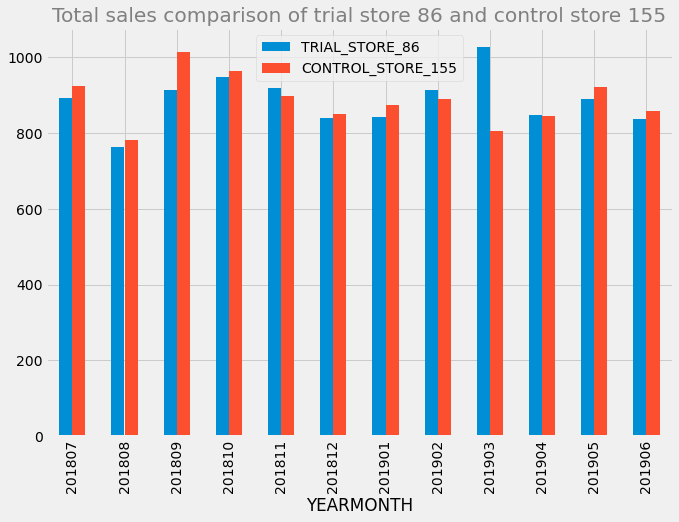

In [31]:
style.use('fivethirtyeight')
total_sales_155 = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR']==155]['TOT_SALES']
total_sales_86 = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR']==86]['TOT_SALES']
yearmonth = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR']==86]['YEARMONTH']

df_plot_sales_86_155 = pd.DataFrame({'YEARMONTH':yearmonth,'TRIAL_STORE_86':total_sales_86})
df_plot_sales_86_155['CONTROL_STORE_155'] = list(total_sales_155)

df_plot_sales_86_155.plot(x='YEARMONTH', y=['TRIAL_STORE_86','CONTROL_STORE_155'], kind="bar",figsize=(10,7))
plt.title('Total sales comparison of trial store 86 and control store 155',color='grey');

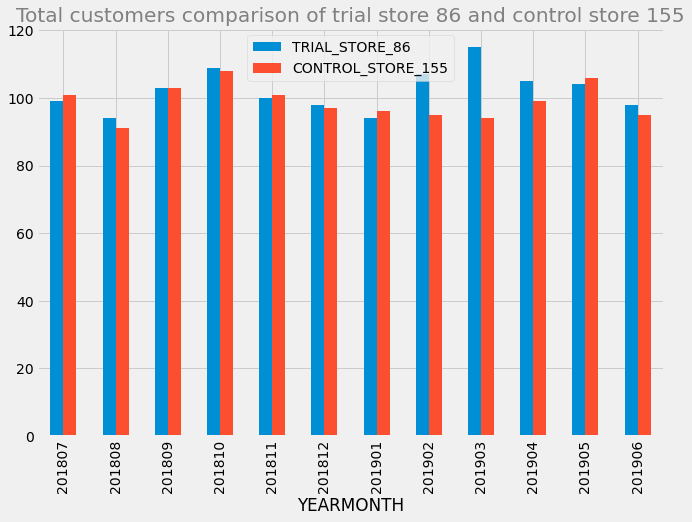

In [32]:
style.use('fivethirtyeight')
total_customers_155 = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR']==155]['TOTAL_CUSTOMERS']
total_customers_86 = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR']==86]['TOTAL_CUSTOMERS']
yearmonth = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR']==86]['YEARMONTH']

df_plot_customers_86_155 = pd.DataFrame({'YEARMONTH':yearmonth,'TRIAL_STORE_86':total_customers_86})
df_plot_customers_86_155['CONTROL_STORE_155'] = list(total_customers_155)

df_plot_customers_86_155.plot(x='YEARMONTH', y=['TRIAL_STORE_86','CONTROL_STORE_155'], kind="bar",figsize=(10,7))
plt.title('Total customers comparison of trial store 86 and control store 155',color='grey');

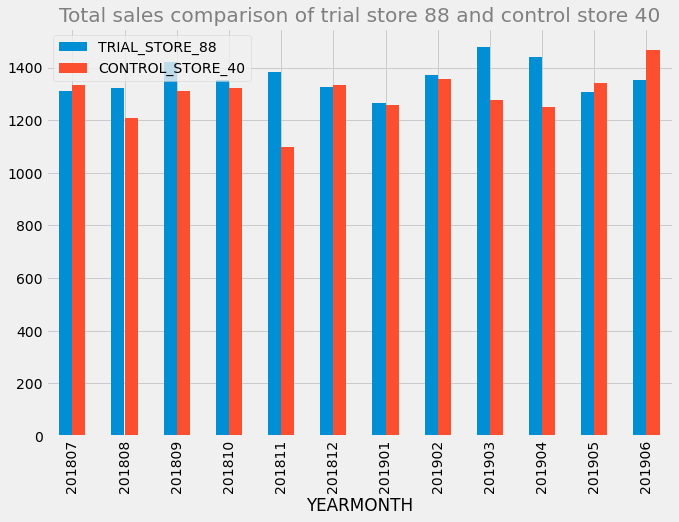

In [33]:
style.use('fivethirtyeight')
total_sales_40 = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR']==40]['TOT_SALES']
total_sales_88 = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR']==88]['TOT_SALES']
yearmonth = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR']==88]['YEARMONTH']

df_plot_sales_88_40 = pd.DataFrame({'YEARMONTH':yearmonth,'TRIAL_STORE_88':total_sales_88})
df_plot_sales_88_40['CONTROL_STORE_40'] = list(total_sales_40)

df_plot_sales_88_40.plot(x='YEARMONTH', y=['TRIAL_STORE_88','CONTROL_STORE_40'], kind="bar",figsize=(10,7))
plt.title('Total sales comparison of trial store 88 and control store 40',color='grey');

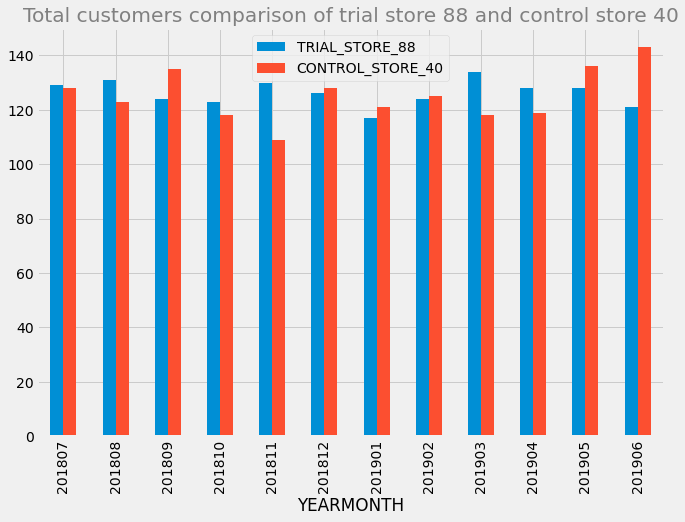

In [34]:
style.use('fivethirtyeight')
total_customers_40 = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR']==40]['TOTAL_CUSTOMERS']
total_customers_88 = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR']==88]['TOTAL_CUSTOMERS']
yearmonth = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR']==88]['YEARMONTH']

df_plot_customers_88_40 = pd.DataFrame({'YEARMONTH':yearmonth,'TRIAL_STORE_88':total_customers_88})
df_plot_customers_88_40['CONTROL_STORE_40'] = list(total_customers_40)

df_plot_customers_88_40.plot(x='YEARMONTH', y=['TRIAL_STORE_88','CONTROL_STORE_40'], kind="bar",figsize=(10,7))
plt.title('Total customers comparison of trial store 88 and control store 40',color='grey');

The trial period goes from the start of February 2019 to April 2019. We now want to
see if there has been an uplift in overall chip sales.
We'll start with scaling the control store's sales to a level similar to control
for any differences between the two stores outside of the trial period.

In [35]:
total_sales_77 = df_pretrial_full_12[(df_pretrial_full_12['STORE_NBR'] == 77)&(df_pretrial_full_12['YEARMONTH']<'201902')]['TOT_SALES'].sum()
total_sales_233 = df_pretrial_full_12[(df_pretrial_full_12['STORE_NBR'] == 233)&(df_pretrial_full_12['YEARMONTH']<'201902')]['TOT_SALES'].sum()
scalingFactorForControlSales_77 = total_sales_77/total_sales_233
print('Scaling factor for trial store number 77 {}'.format(scalingFactorForControlSales_77))

Scaling factor for trial store number 77 1.023617303289553


In [36]:
total_sales_86 = df_pretrial_full_12[(df_pretrial_full_12['STORE_NBR'] == 86)&(df_pretrial_full_12['YEARMONTH']<'201902')]['TOT_SALES'].sum()
total_sales_155 = df_pretrial_full_12[(df_pretrial_full_12['STORE_NBR'] == 155)&(df_pretrial_full_12['YEARMONTH']<'201902')]['TOT_SALES'].sum()
scalingFactorForControlSales_86 = total_sales_86/total_sales_155
print('Scaling factor for trial store number 86 {}'.format(scalingFactorForControlSales_86))

Scaling factor for trial store number 86 0.9700651481287746


In [37]:
total_sales_88 = df_pretrial_full_12[(df_pretrial_full_12['STORE_NBR'] == 88)&(df_pretrial_full_12['YEARMONTH']<'201902')]['TOT_SALES'].sum()
total_sales_40 = df_pretrial_full_12[(df_pretrial_full_12['STORE_NBR'] == 40)&(df_pretrial_full_12['YEARMONTH']<'201902')]['TOT_SALES'].sum()
scalingFactorForControlSales_88 = total_sales_88/total_sales_40
print('Scaling factor for trial store number 88 {}'.format(scalingFactorForControlSales_88))

Scaling factor for trial store number 88 1.0582848378219878


In [38]:
trial_period = ['201902','201903','201904']

trial_sales_77 = []
controlled_scalled_sales_233 = []

for year in trial_period:    
    sales_77 = float(df_pretrial_full_12[(df_pretrial_full_12['STORE_NBR'] == 77)&(df_pretrial_full_12['YEARMONTH']==year)]['TOT_SALES'])
    sales_233 = float(df_pretrial_full_12[(df_pretrial_full_12['STORE_NBR'] == 233)&(df_pretrial_full_12['YEARMONTH']==year)]['TOT_SALES'])
    trial_sales_77.append(sales_77)
    controlled_scalled_sales_233.append(sales_233*scalingFactorForControlSales_77)
        

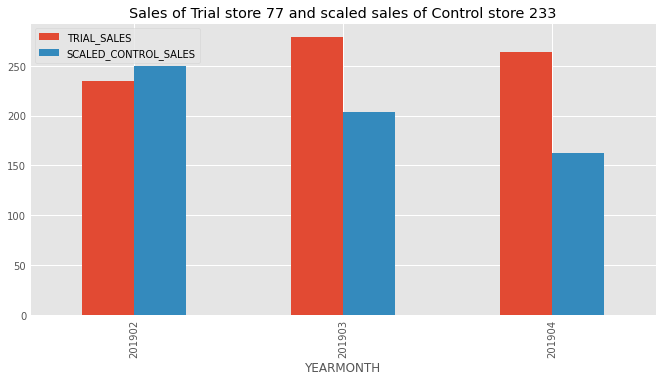

In [39]:
style.use('ggplot')
df_trial_period_77_233 = pd.DataFrame({'YEARMONTH':trial_period,'TRIAL_SALES':trial_sales_77,'SCALED_CONTROL_SALES':controlled_scalled_sales_233})

df_trial_period_77_233.plot(x='YEARMONTH', y=['TRIAL_SALES','SCALED_CONTROL_SALES'], kind="bar",figsize=(10,5))
plt.title('Sales of Trial store 77 and scaled sales of Control store 233');

In [40]:
trial_period = ['201902','201903','201904']

trial_sales_86 = []
controlled_scalled_sales_155 = []

for year in trial_period:    
    sales_86 = float(df_pretrial_full_12[(df_pretrial_full_12['STORE_NBR'] == 86)&(df_pretrial_full_12['YEARMONTH']==year)]['TOT_SALES'])
    sales_155 = float(df_pretrial_full_12[(df_pretrial_full_12['STORE_NBR'] == 155)&(df_pretrial_full_12['YEARMONTH']==year)]['TOT_SALES'])
    trial_sales_86.append(sales_86)
    controlled_scalled_sales_155.append(sales_155*scalingFactorForControlSales_86)
        

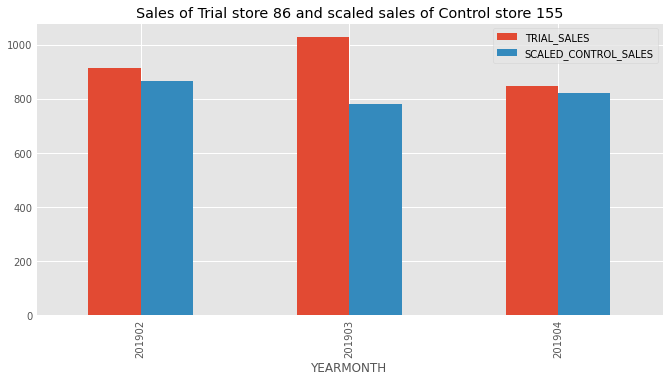

In [41]:
style.use('ggplot')
df_trial_period_86_155 = pd.DataFrame({'YEARMONTH':trial_period,'TRIAL_SALES':trial_sales_86,'SCALED_CONTROL_SALES':controlled_scalled_sales_155})

df_trial_period_86_155.plot(x='YEARMONTH', y=['TRIAL_SALES','SCALED_CONTROL_SALES'], kind="bar",figsize=(10,5))
plt.title('Sales of Trial store 86 and scaled sales of Control store 155');

In [42]:
trial_period = ['201902','201903','201904']

trial_sales_88 = []
controlled_scalled_sales_40 = []

for year in trial_period:    
    sales_88 = float(df_pretrial_full_12[(df_pretrial_full_12['STORE_NBR'] == 88)&(df_pretrial_full_12['YEARMONTH']==year)]['TOT_SALES'])
    sales_40 = float(df_pretrial_full_12[(df_pretrial_full_12['STORE_NBR'] == 40)&(df_pretrial_full_12['YEARMONTH']==year)]['TOT_SALES'])
    trial_sales_88.append(sales_88)
    controlled_scalled_sales_40.append(sales_40*scalingFactorForControlSales_88)
        

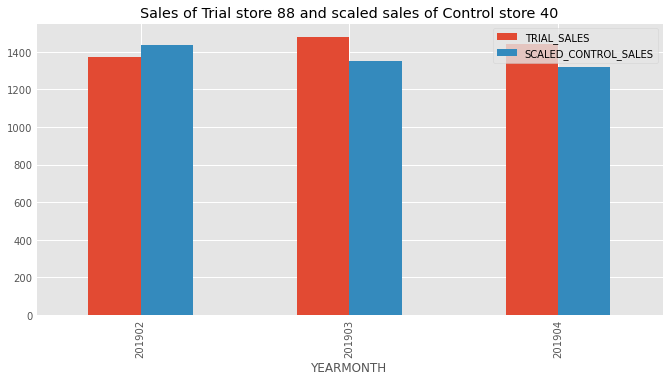

In [43]:
style.use('ggplot')
df_trial_period_88_40 = pd.DataFrame({'YEARMONTH':trial_period,'TRIAL_SALES':trial_sales_88,'SCALED_CONTROL_SALES':controlled_scalled_sales_40})

df_trial_period_88_40.plot(x='YEARMONTH', y=['TRIAL_SALES','SCALED_CONTROL_SALES'], kind="bar",figsize=(10,5))
plt.title('Sales of Trial store 88 and scaled sales of Control store 40');

In [44]:
#Percentage diffrence between trial store 77 sales and control store 233 scales sales.

percentage_difference_77_233 = sum(trial_sales_77)/sum(controlled_scalled_sales_233)
print(percentage_difference_77_233)


1.2615468650086274


In [45]:
#Percentage diffrence between trial store 86 sales and control store 155 scales sales.

percentage_difference_86_155 = sum(trial_sales_86)/sum(controlled_scalled_sales_155)
print(percentage_difference_86_155)


1.13150143573637


In [46]:
#Percentage diffrence between trial store 88 sales and control store 40 scales sales.

percentage_difference_88_40 = sum(trial_sales_88)/sum(controlled_scalled_sales_40)
print(percentage_difference_88_40)


1.0434583458542188


In [47]:
#pretrial scaled sales and trial scaled sales.

scaled_sales = []
control_stores = [233,155,40]
pretrial_scaled_sales = pd.DataFrame()

for store in control_stores:
    temp1 = df_pretrial_full_12[(df_pretrial_full_12['STORE_NBR'] == store)&(df_pretrial_full_12['YEARMONTH']<'201902')][['STORE_NBR','YEARMONTH','TOT_SALES']]
    pretrial_scaled_sales = pretrial_scaled_sales.append(temp1,ignore_index=True)
    
total_sales = []

for index,row in pretrial_scaled_sales.iterrows():
    if(row['STORE_NBR'] == 233):
        total_sales.append(row['TOT_SALES']*scalingFactorForControlSales_77)
    elif(row['STORE_NBR'] == 155):
        total_sales.append(row['TOT_SALES']*scalingFactorForControlSales_86)
    elif(row['STORE_NBR'] == 40):
        total_sales.append(row['TOT_SALES']*scalingFactorForControlSales_88)
        
pretrial_scaled_sales['TOT_SALES'] = total_sales
pretrial_scaled_sales

,STORE_NBR,YEARMONTH,TOT_SALES
0,233,201807,297.565550
1,233,201808,292.652187
2,233,201809,233.998916
3,233,201810,190.085733
4,233,201811,216.597421
5,233,201812,286.408121
6,233,201901,181.692071
7,155,201807,896.922236
8,155,201808,759.269991
9,155,201809,984.034086


In [48]:
#Null Hypothesis : There is difference between the pretrial and the trial period.

scaled_sales = []
control_stores = [233,155,40]
trial_scaled_sales = pd.DataFrame()

for store in control_stores:
    temp1 = df_pretrial_full_12[(df_pretrial_full_12['STORE_NBR'] == store)&((df_pretrial_full_12['YEARMONTH']>='201902')&(df_pretrial_full_12['YEARMONTH']<='201904'))][['STORE_NBR','YEARMONTH','TOT_SALES']]
    trial_scaled_sales = trial_scaled_sales.append(temp1,ignore_index=True)
    
total_sales = []

for index,row in trial_scaled_sales.iterrows():
    if(row['STORE_NBR'] == 233):
        total_sales.append(row['TOT_SALES']*scalingFactorForControlSales_77)
    elif(row['STORE_NBR'] == 155):
        total_sales.append(row['TOT_SALES']*scalingFactorForControlSales_86)
    elif(row['STORE_NBR'] == 40):
        total_sales.append(row['TOT_SALES']*scalingFactorForControlSales_88)
        
trial_scaled_sales['TOT_SALES'] = total_sales
trial_scaled_sales

,STORE_NBR,YEARMONTH,TOT_SALES
0,233,201902,249.762622
1,233,201903,203.802205
2,233,201904,162.345704
3,155,201902,864.522060
4,155,201903,780.320405
5,155,201904,819.317024
6,40,201902,1434.399269
7,40,201903,1352.064709
8,40,201904,1321.797762


A null hypothesis is a type of hypothesis used in statistics that proposes that there is no difference between certain characteristics of a population (or data-generating process). For example, a gambler may be interested in whether a game of chance is fair.

<h4>1.Our null hypothesis is that there is no difference in the pretrial and trial period sales for control stores</h4>
<h4>2.Our null hypothesis is that there is no difference in the pretrial  sales for control stores(scaled) and trial stores</h4>

In [49]:
from scipy.stats import ttest_ind,t

for store in control_stores:
    print('CONTROL STORE : {}'.format(store))
    print(ttest_ind(trial_scaled_sales[trial_scaled_sales['STORE_NBR']==store]['TOT_SALES'],
         pretrial_scaled_sales[pretrial_scaled_sales['STORE_NBR']==store]['TOT_SALES'],
         equal_var=False),'\n')

alpha=0.05
print('Confidence interval for 95%')
print(t.ppf((alpha/2,1-alpha/2),min([len(trial_scaled_sales[trial_scaled_sales['STORE_NBR']==40]),len(pretrial_scaled_sales[pretrial_scaled_sales['STORE_NBR']==40])])-1))

CONTROL STORE : 233
Ttest_indResult(statistic=-1.1911026010974504, pvalue=0.29445006064862156) 

CONTROL STORE : 155
Ttest_indResult(statistic=-1.429195687929098, pvalue=0.19727058651603258) 

CONTROL STORE : 40
Ttest_indResult(statistic=0.5958372343168585, pvalue=0.5722861621434009) 

Confidence interval for 95%
[-4.30265273  4.30265273]



<h4>T-Values and P-Values</h4>

Let’s say you have a cold and you try a naturopathic remedy. Your cold lasts a couple of days. The next time you have a cold, you buy an over-the-counter pharmaceutical and the cold lasts a week. You survey your friends and they all tell you that their colds were of a shorter duration (an average of 3 days) when they took the homeopathic remedy. What you really want to know is, are these results repeatable? A t test can tell you by comparing the means of the two groups and letting you know the probability of those results happening by chance.

When you run a t test, the bigger the t-value, the more likely it is that the results are repeatable.

A large t-score tells you that the groups are different.
A small t-score tells you that the groups are similar.

How big is “big enough”? Every t-value has a p-value to go with it. A p-value is the probability that the results from your sample data occurred by chance. P-values are from 0% to 100%. They are usually written as a decimal. For example, a p value of 5% is 0.05. Low p-values are good; They indicate your data did not occur by chance. For example, a p-value of .01 means there is only a 1% probability that the results from an experiment happened by chance. In most cases, a p-value of 0.05 (5%) is accepted to mean the data is valid.

<h4>Critical value for 95% confidence interval.</h4>

95% confidence interval for a T distribution(Just like normal distribution but with flater tails) will give us a range which depends upon degree of freedom.

<h4>Note:</h4>The particular form of the t distribution is determined by its degrees of freedom. The degrees of freedom refers to the number of independent observations in a set of data. When estimating a mean score or a proportion from a single sample, the number of independent observations is equal to the sample size minus one.

For eg we geta range of -3 to 3 for 95% confidence interval. It means that 95% of our values lie at either -3 or +3 from the mean of the observation.


In [50]:
#Null Hypothesis: There is  difference between trial store sales and control store scaled sales.

store_realtions = dict({77:233,86:155,88:40})

for trial,control in store_realtions.items():
    print('For trial store {} and control store {}'.format(trial,control))
    print(ttest_ind(df_pretrial_full_12[(df_pretrial_full_12['STORE_NBR']==trial)&(df_pretrial_full_12['YEARMONTH']<'201902')]['TOT_SALES'],
                   pretrial_scaled_sales[pretrial_scaled_sales['STORE_NBR']==control]['TOT_SALES'],equal_var=False),'\n')
    

alpha=0.05
print('Confidence interval for 95%')
print(t.ppf((alpha/2,1-alpha/2),len(df_pretrial_full_12[(df_pretrial_full_12['STORE_NBR']==trial)&(df_pretrial_full_12['YEARMONTH']<'201902')])-1))

For trial store 77 and control store 233
Ttest_indResult(statistic=-1.2533353315065928e-15, pvalue=0.999999999999999) 

For trial store 86 and control store 155
Ttest_indResult(statistic=0.0, pvalue=1.0) 

For trial store 88 and control store 40
Ttest_indResult(statistic=0.0, pvalue=1.0) 

Confidence interval for 95%
[-2.44691185  2.44691185]


<h4>If the p-value is less than 0.05, we reject the null hypothesis that there's no difference between the means and conclude that a significant difference does exist. If the p-value is larger than 0.05, we cannot conclude that a significant difference exists</h4>

<h4>Hence for both of our hypothesis the pvalue is greater than 0.05 and so they are proven true.</h4>

In [83]:
#Making a table of percentage difference between sales of trial stores and scaled sales of control stores.

yearmonth = list(df_pretrial_full_12[(df_pretrial_full_12['YEARMONTH']>='201807')&(df_pretrial_full_12['YEARMONTH']<='201906')]['YEARMONTH'].unique())
period = ['pretrial' for i in range(7)]
period.append('trial')
period.append('trial')
period.append('trial')
period.append('posttrial')
period.append('posttrial')


In [84]:
pd.set_option('display.max_rows', 40)


df_percentage_difference = pd.DataFrame()
temp = pd.DataFrame()

for store in control_stores:
    
    temp['YEARMONTH'] = yearmonth
    temp['PERIOD'] = period
    
    total_sales = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR'] == store]['TOT_SALES']
    
    if(store == 233):
        scaled_sales = scalingFactorForControlSales_77*total_sales
        temp['TRIAL_STORE'] = 77
        trial_sales = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR']== 77]['TOT_SALES']
    elif(store == 155):
        scaled_sales = scalingFactorForControlSales_86*total_sales
        temp['TRIAL_STORE'] = 86
        trial_sales = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR'] == 86]['TOT_SALES']
    elif(store == 40):
        scaled_sales = scalingFactorForControlSales_88*total_sales
        temp['TRIAL_STORE'] = 88
        trial_sales = df_pretrial_full_12[df_pretrial_full_12['STORE_NBR'] == 88]['TOT_SALES']
        
    temp['SCALED_SALES'] = list(scaled_sales)
    temp['CONTROL_STORE'] = store
    temp['TRIAL_STORE_SALES'] = list(trial_sales)
    temp['PERCENTAGE_DIFFERENCE'] = (temp['TRIAL_STORE_SALES']-temp['SCALED_SALES'])/((temp['TRIAL_STORE_SALES']+temp['SCALED_SALES'])/2)
    df_percentage_difference = df_percentage_difference.append(temp,ignore_index=True)
    
    
        
df_percentage_difference
        

,YEARMONTH,PERIOD,TRIAL_STORE,SCALED_SALES,CONTROL_STORE,TRIAL_STORE_SALES,PERCENTAGE_DIFFERENCE
0,201807,pretrial,77,297.565550,233,296.80,-0.002576
1,201808,pretrial,77,292.652187,233,255.50,-0.135554
2,201809,pretrial,77,233.998916,233,225.20,-0.038323
3,201810,pretrial,77,190.085733,233,204.50,0.073060
4,201811,pretrial,77,216.597421,233,245.30,0.124281
5,201812,pretrial,77,286.408121,233,267.30,-0.069019
6,201901,pretrial,77,181.692071,233,204.40,0.117630
7,201902,trial,77,249.762622,233,235.00,-0.060907
8,201903,trial,77,203.802205,233,278.50,0.309755
9,201904,trial,77,162.345704,233,263.50,0.475075
